In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../data/lila_image_urls_and_labels.csv", low_memory = False)
df.head()

dataset_name                                            url_gcp  \
0  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
1  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
2  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
3  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
4  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   

                                             url_aws  \
0  http://us-west-2.opendata.source.coop.s3.amazo...   
1  http://us-west-2.opendata.source.coop.s3.amazo...   
2  http://us-west-2.opendata.source.coop.s3.amazo...   
3  http://us-west-2.opendata.source.coop.s3.amazo...   
4  http://us-west-2.opendata.source.coop.s3.amazo...   

                                           url_azure  \
0  https://lilawildlife.blob.core.windows.net/lil...   
1  https://lilawildlife.blob.core.windows.net/lil...   
2  https://lilawildlife.blob.core.windows.net/lil...   
3  https://lilawildlife.blob.core.windows.net/lil...   
4  https://lilawildlife.blob.core.windows.net/lil...   

                                            image_id  \
0  Caltech Camera Traps : 5968c0f9-23d2-11e8-a6a3...   
1  Caltech Camera Traps : 5a0b016f-23d2-11e8-a6a3...   
2  Caltech Camera Traps : 59b93afb-23d2-11e8-a6a3...   
3  Caltech Camera Traps : 59641f56-23d2-11e8-a6a3...   
4  Caltech Camera Traps : 5a1e5306-23d2-11e8-a6a3...   

                                         sequence_id  \
0  Caltech Camera Traps : 6f2160eb-5567-11e8-990e...   
1  Caltech Camera Traps : 6f27ed66-5567-11e8-9e92...   
2  Caltech Camera Traps : 6f04895c-5567-11e8-a3d6...   
3  Caltech Camera Traps : 6f0385b5-5567-11e8-a80b...   
4  Caltech Camera Traps : 6f0a3ccf-5567-11e8-92fb...   

                 location_id  frame_num original_label       scientific_name  \
0  Caltech Camera Traps : 26          1          empty                   NaN   
1  Caltech Camera Traps : 26          1           deer            odocoileus   
2  Caltech Camera Traps : 38          2            cat           felis catus   
3  Caltech Camera Traps : 38          2        opossum  didelphis virginiana   
4  Caltech Camera Traps : 33          2          empty                   NaN   

   ...    suborder infraorder superfamily       family    subfamily  \
0  ...         NaN        NaN         NaN          NaN          NaN   
1  ...  ruminantia        NaN         NaN     cervidae  capreolinae   
2  ...         NaN        NaN         NaN      felidae      felinae   
3  ...         NaN        NaN         NaN  didelphidae  didelphinae   
4  ...         NaN        NaN         NaN          NaN          NaN   

         tribe       genus               species subspecies variety  
0          NaN         NaN                   NaN        NaN     NaN  
1  odocoileini  odocoileus                   NaN        NaN     NaN  
2          NaN       felis           felis catus        NaN     NaN  
3   didelphini   didelphis  didelphis virginiana        NaN     NaN  
4          NaN         NaN                   NaN        NaN     NaN  

[5 rows x 32 columns]

In [3]:
df.columns

Index(['dataset_name', 'url_gcp', 'url_aws', 'url_azure', 'image_id',
       'sequence_id', 'location_id', 'frame_num', 'original_label',
       'scientific_name', 'common_name', 'datetime', 'annotation_level',
       'kingdom', 'phylum', 'subphylum', 'superclass', 'class', 'subclass',
       'infraclass', 'superorder', 'order', 'suborder', 'infraorder',
       'superfamily', 'family', 'subfamily', 'tribe', 'genus', 'species',
       'subspecies', 'variety'],
      dtype='object')

In [4]:
df.annotation_level.value_counts()

annotation_level
sequence    12710778
unknown      3382215
image        3258163
Name: count, dtype: int64

Annotation level indicates iimage vs sequence (or unknown), not analogous to `taxonomy_level` from lila-taxonomy-mapping_release.csv. It seems `original_label` may be the analogous column.

We'll likely want to pull out the image-level before doing any sequence checks and such since those should be "clean" images. Though we will want to label them with how many distinct species are in the image first.

We now have 66 less sequence-level annotations and 2,517,374 more image-level! That's quite the update! The unknown count has not changed.

### Check Dataset Counts

1. Make sure we have all datasets expected.
2. Check which/how many datasets are labeled to the image level (and check for match to [Andrey's spreadsheet](https://docs.google.com/spreadsheets/d/1sC90DolAvswDUJ1lNSf0sk_norR24LwzX2O4g9OxMZE/edit?usp=drive_link)).

In [5]:
df.dataset_name.value_counts()

dataset_name
Snapshot Serengeti                            7261545
NACTI                                         3382215
Trail Camera Images of New Zealand Animals    2453840
SWG Camera Traps                              2039657
Idaho Camera Traps                            1551552
WCS Camera Traps                              1369953
Wellington Camera Traps                        270450
Channel Islands Camera Traps                   245644
Caltech Camera Traps                           243177
Island Conservation Camera Traps               128207
Orinoquia Camera Traps                         112267
Snapshot Mountain Zebra                         73606
Desert Lion Conservation Camera Traps           63468
Snapshot Karoo                                  38320
Snapshot Camdeboo                               30717
Snapshot Enonkishu                              30542
Missouri Camera Traps                           24673
Snapshot Kruger                                 10637
Snapshot Kgalag

In [6]:
df.groupby(["dataset_name"]).annotation_level.value_counts()

dataset_name                                annotation_level
Caltech Camera Traps                        image                243177
Channel Islands Camera Traps                image                245644
Desert Lion Conservation Camera Traps       image                 63468
ENA24                                       image                 10284
Idaho Camera Traps                          sequence            1551552
Island Conservation Camera Traps            image                128207
Missouri Camera Traps                       sequence              23397
                                            image                  1276
NACTI                                       unknown             3382215
Orinoquia Camera Traps                      image                112267
SWG Camera Traps                            sequence            2039657
Snapshot Camdeboo                           sequence              30717
Snapshot Enonkishu                          sequence              30542
Sna

It seems all the unknown annotation level images are in NACTI (North American Camera Trap Images). At first glance I don't see annotation level information on HF or on [their LILA page](https://lila.science/datasets/nacti)--will require more looking.

Desert Lion Conservation Camera Traps & Trail Camera Images of New Zealand Animals are _not_ included in the [Hugging Face dataset](https://huggingface.co/datasets/society-ethics/lila_camera_traps).

There are definitely more in [Andrey's spreadsheet](https://docs.google.com/spreadsheets/d/1sC90DolAvswDUJ1lNSf0sk_norR24LwzX2O4g9OxMZE/edit?usp=drive_link) that aren't included here. We'll have him go through those too.

In [7]:
df.sample(10)

dataset_name  \
12061234                          Snapshot Serengeti   
6586492                           Idaho Camera Traps   
2786883                                        NACTI   
13855386                          Snapshot Serengeti   
9992570                           Snapshot Serengeti   
2900006                                        NACTI   
16472694                            SWG Camera Traps   
18408513  Trail Camera Images of New Zealand Animals   
17944687  Trail Camera Images of New Zealand Animals   
674082                                         NACTI   

                                                    url_gcp  \
12061234  https://storage.googleapis.com/public-datasets...   
6586492   https://storage.googleapis.com/public-datasets...   
2786883   https://storage.googleapis.com/public-datasets...   
13855386  https://storage.googleapis.com/public-datasets...   
9992570   https://storage.googleapis.com/public-datasets...   
2900006   https://storage.googleapis.com/public-datasets...   
16472694  https://storage.googleapis.com/public-datasets...   
18408513  https://storage.googleapis.com/public-datasets...   
17944687  https://storage.googleapis.com/public-datasets...   
674082    https://storage.googleapis.com/public-datasets...   

                                                    url_aws  \
12061234  http://us-west-2.opendata.source.coop.s3.amazo...   
6586492   http://us-west-2.opendata.source.coop.s3.amazo...   
2786883   http://us-west-2.opendata.source.coop.s3.amazo...   
13855386  http://us-west-2.opendata.source.coop.s3.amazo...   
9992570   http://us-west-2.opendata.source.coop.s3.amazo...   
2900006   http://us-west-2.opendata.source.coop.s3.amazo...   
16472694  http://us-west-2.opendata.source.coop.s3.amazo...   
18408513  http://us-west-2.opendata.source.coop.s3.amazo...   
17944687  http://us-west-2.opendata.source.coop.s3.amazo...   
674082    http://us-west-2.opendata.source.coop.s3.amazo...   

                                                  url_azure  \
12061234  https://lilawildlife.blob.core.windows.net/lil...   
6586492   https://lilawildlife.blob.core.windows.net/lil...   
2786883   https://lilawildlife.blob.core.windows.net/lil...   
13855386  https://lilawildlife.blob.core.windows.net/lil...   
9992570   https://lilawildlife.blob.core.windows.net/lil...   
2900006   https://lilawildlife.blob.core.windows.net/lil...   
16472694  https://lilawildlife.blob.core.windows.net/lil...   
18408513  https://lilawildlife.blob.core.windows.net/lil...   
17944687  https://lilawildlife.blob.core.windows.net/lil...   
674082    https://lilawildlife.blob.core.windows.net/lil...   

                                                   image_id  \
12061234  Snapshot Serengeti : S8/N06/N06_R2/S8_N06_R2_I...   
6586492             Idaho Camera Traps : loc_0067_im_006951   
2786883          NACTI : FL-28_09_01_2016_FL-28_0059198.JPG   
13855386  Snapshot Serengeti : S10/O12/O12_R1/S10_O12_R1...   
9992570   Snapshot Serengeti : S5/U12/U12_R1/S5_U12_R1_I...   
2900006          NACTI : FL-31_01_21_2016_FL-31_0036063.jpg   
16472694  SWG Camera Traps : d98b4691-8c29-11eb-85d7-000...   
18408513  Trail Camera Images of New Zealand Animals : E...   
17944687  Trail Camera Images of New Zealand Animals : E...   
674082           NACTI : CA-06_08_10_2016_CA-06_0015357.JPG   

                                                sequence_id  \
12061234              Snapshot Serengeti : SER_S8#N06#2#628   
6586492            Idaho Camera Traps : loc_0067_seq_006947   
2786883                                     NACTI : unknown   
13855386             Snapshot Serengeti : SER_S10#O12#1#104   
9992570                Snapshot Serengeti : SER_S5#U12#1#63   
2900006                                     NACTI : unknown   
16472694  SWG Camera Traps : fad4a034-8c29-11eb-8cda-000...   
18408513  Trail Camera Images of New Zealand Animals : u...   
17944687  Trail Camera Images of New Zealand Animals : u...   
674082           

Observe that we also now get multiple URL options; `url_aws` will likely be best/fastest for use with [`distributed-downloader`](https://github.com/Imageomics/distributed-downloader) to get the images.

In [8]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19351156 entries, 0 to 19351155
Data columns (total 32 columns):
 #   Column            Non-Null Count     Dtype 
---  ------            --------------     ----- 
 0   dataset_name      19351156 non-null  object
 1   url_gcp           19351156 non-null  object
 2   url_aws           19351156 non-null  object
 3   url_azure         19351156 non-null  object
 4   image_id          19351156 non-null  object
 5   sequence_id       19351156 non-null  object
 6   location_id       19351156 non-null  object
 7   frame_num         19351156 non-null  int64 
 8   original_label    19351156 non-null  object
 9   scientific_name   10192703 non-null  object
 10  common_name       10192703 non-null  object
 11  datetime          15404050 non-null  object
 12  annotation_level  19351156 non-null  object
 13  kingdom           10192703 non-null  object
 14  phylum            10177119 non-null  object
 15  subphylum         10141160 non-null  object
 16

The overall dataset has grown by about 3 million images, we'll see how much of this is non-empty. I'm encouraged by the number of non-null `scientific_name` values seeming to also grow by about 3 million; most of these also seem to have genus now.

We'll definitely want to check on the scientifc name choices where genus and species aren't available, similarly for other ranks, as it is guarunteed as much as kingdom (which is hopefully aligned with all non-empty images).

No licensing info, we'll get that from HF or the datasets themselves (Andrey can check this; most seem to be [Community Data License Agreement (permissive variant)](https://cdla.io/permissive-1-0/)).

In [9]:
df.nunique()

dataset_name              20
url_gcp             19249146
url_aws             19249146
url_azure           19249146
image_id            19249146
sequence_id          4772758
location_id             9931
frame_num              11005
original_label          1227
scientific_name          908
common_name              999
datetime             8559012
annotation_level           3
kingdom                    1
phylum                     2
subphylum                  5
superclass                 1
class                      8
subclass                   3
infraclass                 2
superorder                 5
order                     58
suborder                  17
infraorder                 9
superfamily               12
family                   187
subfamily                 71
tribe                     46
genus                    538
species                  739
subspecies                12
variety                    1
dtype: int64

We have 739 unique species indicated, though the 908 unique `scientific_name` values is likely more indicative of the diversity.

Interesting also to note that there are duplicate URLs here; these would be the indicators of multiple species in an image as they correspond to the number of unique image IDs. We'll check this out once we remove the images labeled as "empty".

In [10]:
#check for humans
df.loc[df.species == "homo sapien"]

Empty DataFrame
Columns: [dataset_name, url_gcp, url_aws, url_azure, image_id, sequence_id, location_id, frame_num, original_label, scientific_name, common_name, datetime, annotation_level, kingdom, phylum, subphylum, superclass, class, subclass, infraclass, superorder, order, suborder, infraorder, superfamily, family, subfamily, tribe, genus, species, subspecies, variety]
Index: []

[0 rows x 32 columns]

Let's start by removing entries with `original_label`: `empty`.

In [12]:
df_cleaned = df.loc[df.original_label != "empty"].copy()

## Save the Reduced Data (no more "empty" labels)

In [13]:
df_cleaned.to_csv("../data/lila_image_urls_and_labels.csv", index = False)

Let's check where we are with annotations now that we've removed all the images labeled as empty.

In [14]:
df.groupby(["dataset_name"]).annotation_level.value_counts()

dataset_name                                annotation_level
Caltech Camera Traps                        image                243177
Channel Islands Camera Traps                image                245644
Desert Lion Conservation Camera Traps       image                 63468
ENA24                                       image                 10284
Idaho Camera Traps                          sequence            1551552
Island Conservation Camera Traps            image                128207
Missouri Camera Traps                       sequence              23397
                                            image                  1276
NACTI                                       unknown             3382215
Orinoquia Camera Traps                      image                112267
SWG Camera Traps                            sequence            2039657
Snapshot Camdeboo                           sequence              30717
Snapshot Enonkishu                          sequence              30542
Sna

We started with 19,351,156 entries, and are left with 10,965,902 after removing all labeled as `empty`, so more than half the images now; it's an increase of about 2.5M from the last version. 

Note that there are still about 3.4 million that don't have the species label, 1.5 million that are missing genus designation. 10,192,703 of them have scientific and common name, though! That's nearly all of them.

In [15]:
df_cleaned.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 10965902 entries, 1 to 19351155
Data columns (total 32 columns):
 #   Column            Non-Null Count     Dtype 
---  ------            --------------     ----- 
 0   dataset_name      10965902 non-null  object
 1   url_gcp           10965902 non-null  object
 2   url_aws           10965902 non-null  object
 3   url_azure         10965902 non-null  object
 4   image_id          10965902 non-null  object
 5   sequence_id       10965902 non-null  object
 6   location_id       10965902 non-null  object
 7   frame_num         10965902 non-null  int64 
 8   original_label    10965902 non-null  object
 9   scientific_name   10192703 non-null  object
 10  common_name       10192703 non-null  object
 11  datetime          7620269 non-null   object
 12  annotation_level  10965902 non-null  object
 13  kingdom           10192703 non-null  object
 14  phylum            10177119 non-null  object
 15  subphylum         10141160 non-null  object
 16  sup

In [16]:
df_cleaned.nunique()

dataset_name              20
url_gcp             10864013
url_aws             10864013
url_azure           10864013
image_id            10864013
sequence_id          1412018
location_id             9848
frame_num              11005
original_label          1226
scientific_name          908
common_name              999
datetime             5479009
annotation_level           3
kingdom                    1
phylum                     2
subphylum                  5
superclass                 1
class                      8
subclass                   3
infraclass                 2
superorder                 5
order                     58
suborder                  17
infraorder                 9
superfamily               12
family                   187
subfamily                 71
tribe                     46
genus                    538
species                  739
subspecies                12
variety                    1
dtype: int64

In [27]:
print(df_cleaned.phylum.value_counts())
print()
print(df_cleaned["class"].value_counts())

phylum
chordata      10166819
arthropoda       10300
Name: count, dtype: int64

class
mammalia        9089968
aves            1068301
reptilia           8416
insecta            7856
amphibia            134
malacostraca         79
arachnida            20
diplopoda             6
Name: count, dtype: int64


We have 10,965,902 total - 10,864,013 unique URLs, suggesting at most 101,889 images have more than one species in them. That's only 1% of our images here and even smaller at the scale we're looking for the next ToL dataset. It is interesting to note though and we should explore this more.

I'm curious about the single "variety", since I thought that was more of a plant label and these are all animals.

All images are in Animalia, as expected; we have 2 phyla represented and 8 classes:
 - Predominantly Chordata, and within that phylum, Mammalia is the vast majority, though aves is about 10%.
 - Note that not every image with a phylum label has a class label.
 - Insecta, malacostraca, arachnida, and diplopoda are all in the class Arthropoda.

### Label Multi-Species Images
We'll go by both the URL and image ID, which do seem to correspond to the same images (for uniqueness).

In [17]:
df_cleaned["multi_species"] = df_cleaned.duplicated(subset = ["url_aws", "image_id"], keep = False)

df_cleaned.loc[df_cleaned["multi_species"]].nunique()

dataset_name           13
url_gcp             99682
url_aws             99682
url_azure           99682
image_id            99682
sequence_id         30668
location_id           514
frame_num             488
original_label        167
scientific_name       133
common_name           143
datetime            42962
annotation_level        2
kingdom                 1
phylum                  2
subphylum               4
superclass              1
class                   6
subclass                3
infraclass              2
superorder              4
order                  27
suborder                9
infraorder              5
superfamily             5
family                 54
subfamily              23
tribe                  21
genus                  90
species                92
subspecies              6
variety                 1
multi_species           1
dtype: int64

We've got just under 100K images that have multiple species. We can figure out how many each of them have, and then move on to looking at images per sequence and other labeling info.

In [20]:
multi_sp_imgs = list(df_cleaned.loc[df_cleaned["multi_species"], "image_id"].unique())

In [22]:
for img in multi_sp_imgs:
    df_cleaned.loc[df_cleaned["image_id"] == img, "num_species"] = df_cleaned.loc[df_cleaned["image_id"] == img].shape[0]
    
df_cleaned.head()

dataset_name                                            url_gcp  \
1  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
2  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
3  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
5  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
6  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   

                                             url_aws  \
1  http://us-west-2.opendata.source.coop.s3.amazo...   
2  http://us-west-2.opendata.source.coop.s3.amazo...   
3  http://us-west-2.opendata.source.coop.s3.amazo...   
5  http://us-west-2.opendata.source.coop.s3.amazo...   
6  http://us-west-2.opendata.source.coop.s3.amazo...   

                                           url_azure  \
1  https://lilawildlife.blob.core.windows.net/lil...   
2  https://lilawildlife.blob.core.windows.net/lil...   
3  https://lilawildlife.blob.core.windows.net/lil...   
5  https://lilawildlife.blob.core.windows.net/lil...   
6  https://lilawildlife.blob.core.windows.net/lil...   

                                            image_id  \
1  Caltech Camera Traps : 5a0b016f-23d2-11e8-a6a3...   
2  Caltech Camera Traps : 59b93afb-23d2-11e8-a6a3...   
3  Caltech Camera Traps : 59641f56-23d2-11e8-a6a3...   
5  Caltech Camera Traps : 5a096955-23d2-11e8-a6a3...   
6  Caltech Camera Traps : 59b93a3b-23d2-11e8-a6a3...   

                                         sequence_id  \
1  Caltech Camera Traps : 6f27ed66-5567-11e8-9e92...   
2  Caltech Camera Traps : 6f04895c-5567-11e8-a3d6...   
3  Caltech Camera Traps : 6f0385b5-5567-11e8-a80b...   
5  Caltech Camera Traps : 70096335-5567-11e8-a99a...   
6  Caltech Camera Traps : 7013c982-5567-11e8-be89...   

                 location_id  frame_num original_label       scientific_name  \
1  Caltech Camera Traps : 26          1           deer            odocoileus   
2  Caltech Camera Traps : 38          2            cat           felis catus   
3  Caltech Camera Traps : 38          2        opossum  didelphis virginiana   
5  Caltech Camera Traps : 36          1            car                   NaN   
6  Caltech Camera Traps : 61          2         rabbit             leporidae   

   ... superfamily       family    subfamily        tribe       genus  \
1  ...         NaN     cervidae  capreolinae  odocoileini  odocoileus   
2  ...         NaN      felidae      felinae          NaN       felis   
3  ...         NaN  didelphidae  didelphinae   didelphini   didelphis   
5  ...         NaN          NaN          NaN          NaN         NaN   
6  ...         NaN    leporidae          NaN          NaN         NaN   

                species subspecies variety multi_species num_species  
1                   NaN        NaN     NaN         False         NaN  
2           felis catus        NaN     NaN         False         NaN  
3  didelphis virginiana        NaN     NaN         False         NaN  
5                   NaN        NaN     NaN         False         NaN  
6                   NaN        NaN     NaN         False         NaN  

[5 rows x 34 columns]

#### Save this to CSV now we got those counts

In [23]:
df_cleaned.to_csv("../data/lila_image_urls_and_labels.csv", index = False)

In [25]:
df_cleaned.loc[df_cleaned["multi_species"]].head()

dataset_name  \
495    Caltech Camera Traps   
496    Caltech Camera Traps   
2645   Caltech Camera Traps   
2646   Caltech Camera Traps   
14220  Caltech Camera Traps   

                                                 url_gcp  \
495    https://storage.googleapis.com/public-datasets...   
496    https://storage.googleapis.com/public-datasets...   
2645   https://storage.googleapis.com/public-datasets...   
2646   https://storage.googleapis.com/public-datasets...   
14220  https://storage.googleapis.com/public-datasets...   

                                                 url_aws  \
495    http://us-west-2.opendata.source.coop.s3.amazo...   
496    http://us-west-2.opendata.source.coop.s3.amazo...   
2645   http://us-west-2.opendata.source.coop.s3.amazo...   
2646   http://us-west-2.opendata.source.coop.s3.amazo...   
14220  http://us-west-2.opendata.source.coop.s3.amazo...   

                                               url_azure  \
495    https://lilawildlife.blob.core.windows.net/lil...   
496    https://lilawildlife.blob.core.windows.net/lil...   
2645   https://lilawildlife.blob.core.windows.net/lil...   
2646   https://lilawildlife.blob.core.windows.net/lil...   
14220  https://lilawildlife.blob.core.windows.net/lil...   

                                                image_id  \
495    Caltech Camera Traps : 5a1cafe6-23d2-11e8-a6a3...   
496    Caltech Camera Traps : 5a1cafe6-23d2-11e8-a6a3...   
2645   Caltech Camera Traps : 5968bf89-23d2-11e8-a6a3...   
2646   Caltech Camera Traps : 5968bf89-23d2-11e8-a6a3...   
14220  Caltech Camera Traps : 59a49aa6-23d2-11e8-a6a3...   

                                             sequence_id  \
495    Caltech Camera Traps : 70139a99-5567-11e8-bb56...   
496    Caltech Camera Traps : 70139a99-5567-11e8-bb56...   
2645   Caltech Camera Traps : 6f0b1bdc-5567-11e8-8df3...   
2646   Caltech Camera Traps : 6f0b1bdc-5567-11e8-8df3...   
14220  Caltech Camera Traps : 70139a99-5567-11e8-bb56...   

                     location_id  frame_num original_label scientific_name  \
495    Caltech Camera Traps : 61          3         badger   taxidea taxus   
496    Caltech Camera Traps : 61          3         coyote   canis latrans   
2645   Caltech Camera Traps : 43          1       squirrel         sciurus   
2646   Caltech Camera Traps : 43          1         bobcat      lynx rufus   
14220  Caltech Camera Traps : 61          1         badger   taxidea taxus   

       ... superfamily      family   subfamily     tribe    genus  \
495    ...         NaN  mustelidae  taxidiinae       NaN  taxidea   
496    ...         NaN     canidae         NaN       NaN    canis   
2645   ...         NaN   sciuridae   sciurinae  sciurini  sciurus   
2646   ...         NaN     felidae     felinae       NaN     lynx   
14220  ...         NaN  mustelidae  taxidiinae       NaN  taxidea   

             species subspecies variety multi_species num_species  
495    taxidea taxus        NaN     NaN          True         2.0  
496    canis latrans        NaN     NaN          True         2.0  
2645             NaN        NaN     NaN          True         2.0  
2646      lynx rufus        NaN     NaN          True         2.0  
14220  taxidea taxus        NaN     NaN          True         2.0  

[5 rows x 34 columns]

How many different species do we generally have when we have multiple species in an image?

In [26]:
df_cleaned.num_species.value_counts()

num_species
2.0    195134
3.0      6069
4.0       368
Name: count, dtype: int64

We have 97,567 images with 2 different species (most multi-species instances), 2,023 with 3 different species, and 92 with 4.

We will want to dedicate some more time to exploring some of these taxonomic counts, but we'll first look at the number of unique taxa (by Linnean 7-rank (`unique_7_tuple`) and then by all taxonomic labels (`unique_taxa`) available). We'll compare these to the number of unique scientific and common names, then perhaps add a count of number of creatures based on one of those labels. At that point we may save another copy of this CSV and start a new analysis notebook.

In [28]:
df_cleaned.annotation_level.value_counts()

annotation_level
sequence    5133907
image       2919136
unknown     2912859
Name: count, dtype: int64

We've got ~3M labeled to the image and another 3M unknonwn labeling (all from NACTI, which Andrey will check on), leaving ~5M labeled only to at the sequence level. This _should_ give Jianyang something to work with to start exploring near-duplicate de-duplication. 

Let's update the non-multi species images to show 1 in the `num_species` column, then move on to checking the taxonomy strings.

In [29]:
df_cleaned.loc[df_cleaned["num_species"].isna(), "num_species"] = 1.0

df_cleaned.num_species.value_counts()

num_species
1.0    10764331
2.0      195134
3.0        6069
4.0         368
Name: count, dtype: int64

### Taxonomic String Exploration

In [33]:
lin_taxa = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
all_taxa = ['kingdom',
            'phylum',
            'subphylum',
            'superclass',
            'class',
            'subclass',
            'infraclass',
            'superorder',
            'order',
            'suborder',
            'infraorder',
            'superfamily',
            'family',
            'subfamily',
            'tribe',
            'genus',
            'species',
            'subspecies',
            'variety']

#### How many have all 7 Linnean ranks?

In [34]:
df_all_taxa = df_cleaned.dropna(subset = lin_taxa)
df_all_taxa[all_taxa].info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 7521712 entries, 2 to 19351155
Data columns (total 19 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   kingdom      7521712 non-null  object
 1   phylum       7521712 non-null  object
 2   subphylum    7521548 non-null  object
 3   superclass   59 non-null       object
 4   class        7521712 non-null  object
 5   subclass     6917435 non-null  object
 6   infraclass   6917376 non-null  object
 7   superorder   6717750 non-null  object
 8   order        7521712 non-null  object
 9   suborder     5374157 non-null  object
 10  infraorder   481338 non-null   object
 11  superfamily  324711 non-null   object
 12  family       7521712 non-null  object
 13  subfamily    5857614 non-null  object
 14  tribe        4854254 non-null  object
 15  genus        7521712 non-null  object
 16  species      7521712 non-null  object
 17  subspecies   74052 non-null    object
 18  variety      2050 non-null

That's pretty good coverage: 7,521,712 out of 10,965,902. It looks like many of them also have the other taxonomic ranks too. Now how many different 7-tuples are there?

#### How many unique 7-tuples?

In [35]:
#number of unique 7-tuples in full dataset
df_cleaned['lin_duplicate'] = df_cleaned.duplicated(subset = lin_taxa, keep = 'first')
df_unique_lin_taxa = df_cleaned.loc[~df_cleaned['lin_duplicate']].copy()
df_unique_lin_taxa.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 19350355
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dataset_name      891 non-null    object 
 1   url_gcp           891 non-null    object 
 2   url_aws           891 non-null    object 
 3   url_azure         891 non-null    object 
 4   image_id          891 non-null    object 
 5   sequence_id       891 non-null    object 
 6   location_id       891 non-null    object 
 7   frame_num         891 non-null    int64  
 8   original_label    891 non-null    object 
 9   scientific_name   890 non-null    object 
 10  common_name       890 non-null    object 
 11  datetime          812 non-null    object 
 12  annotation_level  891 non-null    object 
 13  kingdom           890 non-null    object 
 14  phylum            889 non-null    object 
 15  subphylum         886 non-null    object 
 16  superclass        2 non-null      object 
 1

Interesting, we have 891 unique 7-tuple taxonomic strings, but 1 scientific and common name seem to be missing.
What's the uniqueness count here?

In [37]:
df_unique_lin_taxa.nunique()

dataset_name         20
url_gcp             891
url_aws             891
url_azure           891
image_id            891
sequence_id         661
location_id         620
frame_num            12
original_label      885
scientific_name     890
common_name         886
datetime            806
annotation_level      3
kingdom               1
phylum                2
subphylum             5
superclass            1
class                 8
subclass              3
infraclass            2
superorder            5
order                58
suborder             16
infraorder            9
superfamily          11
family              187
subfamily            71
tribe                46
genus               538
species             739
subspecies            5
variety               1
multi_species         2
num_species           3
lin_duplicate         1
dtype: int64

They're across all datasets. We have 890 unique scientific names and 886 unique common names (from 885 original labels).

In [38]:
df_unique_lin_taxa.loc[(df_unique_lin_taxa["scientific_name"].isna()) | (df_unique_lin_taxa["common_name"].isna())]

dataset_name                                            url_gcp  \
5  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   

                                             url_aws  \
5  http://us-west-2.opendata.source.coop.s3.amazo...   

                                           url_azure  \
5  https://lilawildlife.blob.core.windows.net/lil...   

                                            image_id  \
5  Caltech Camera Traps : 5a096955-23d2-11e8-a6a3...   

                                         sequence_id  \
5  Caltech Camera Traps : 70096335-5567-11e8-a99a...   

                 location_id  frame_num original_label scientific_name  ...  \
5  Caltech Camera Traps : 36          1            car             NaN  ...   

  family subfamily tribe genus species subspecies variety multi_species  \
5    NaN       NaN   NaN   NaN     NaN        NaN     NaN         False   

  num_species lin_duplicate  
5         1.0         False  

[1 rows x 35 columns]

It's a car...We need to remove cars...

In [43]:
df_cleaned.loc[df_cleaned["original_label"] == "car"].shape

(4717, 36)

In [44]:
df_cleaned.loc[df_cleaned["original_label"] == "car", "dataset_name"].value_counts()

dataset_name
Caltech Camera Traps    4717
Name: count, dtype: int64

#### How many unique full taxa (sub ranks included)?

In [36]:
#number of unique 7-tuples in full dataset
df_cleaned['full_duplicate'] = df_cleaned.duplicated(subset = all_taxa, keep = 'first')
df_unique_all_taxa = df_cleaned.loc[~df_cleaned['full_duplicate']].copy()
df_unique_all_taxa.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 1 to 19350355
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dataset_name      909 non-null    object 
 1   url_gcp           909 non-null    object 
 2   url_aws           909 non-null    object 
 3   url_azure         909 non-null    object 
 4   image_id          909 non-null    object 
 5   sequence_id       909 non-null    object 
 6   location_id       909 non-null    object 
 7   frame_num         909 non-null    int64  
 8   original_label    909 non-null    object 
 9   scientific_name   908 non-null    object 
 10  common_name       908 non-null    object 
 11  datetime          827 non-null    object 
 12  annotation_level  909 non-null    object 
 13  kingdom           908 non-null    object 
 14  phylum            907 non-null    object 
 15  subphylum         904 non-null    object 
 16  superclass        2 non-null      object 
 1

When we consider the sub-ranks as well we wind up with 909 unique taxa (still with one scientific and common name missing--the car!).

In [39]:
df_unique_all_taxa.nunique()

dataset_name         20
url_gcp             909
url_aws             909
url_azure           909
image_id            909
sequence_id         673
location_id         629
frame_num            12
original_label      901
scientific_name     908
common_name         901
datetime            821
annotation_level      3
kingdom               1
phylum                2
subphylum             5
superclass            1
class                 8
subclass              3
infraclass            2
superorder            5
order                58
suborder             17
infraorder            9
superfamily          12
family              187
subfamily            71
tribe                46
genus               538
species             739
subspecies           12
variety               1
multi_species         2
num_species           3
lin_duplicate         2
full_duplicate        1
dtype: int64

We have now captured all 908 unique scientific names, but only 901 of the 999 unique common names.

In [40]:
df_unique_all_taxa.loc[(df_unique_all_taxa["scientific_name"].isna()) | (df_unique_all_taxa["common_name"].isna())]

dataset_name                                            url_gcp  \
5  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   

                                             url_aws  \
5  http://us-west-2.opendata.source.coop.s3.amazo...   

                                           url_azure  \
5  https://lilawildlife.blob.core.windows.net/lil...   

                                            image_id  \
5  Caltech Camera Traps : 5a096955-23d2-11e8-a6a3...   

                                         sequence_id  \
5  Caltech Camera Traps : 70096335-5567-11e8-a99a...   

                 location_id  frame_num original_label scientific_name  ...  \
5  Caltech Camera Traps : 36          1            car             NaN  ...   

  subfamily tribe genus species subspecies variety multi_species num_species  \
5       NaN   NaN   NaN     NaN        NaN     NaN         False         1.0   

  lin_duplicate full_duplicate  
5         False          False  

[1 rows x 36 columns]

#### Let's remove those cars

In [45]:
df_cleaned = df_cleaned[df_cleaned["original_label"] != "car"].copy()
df_cleaned[["original_label", "scientific_name", "common_name", "kingdom"]].info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 10961185 entries, 1 to 19351155
Data columns (total 4 columns):
 #   Column           Non-Null Count     Dtype 
---  ------           --------------     ----- 
 0   original_label   10961185 non-null  object
 1   scientific_name  10192703 non-null  object
 2   common_name      10192703 non-null  object
 3   kingdom          10192703 non-null  object
dtypes: object(4)
memory usage: 418.1+ MB


Now we have 10,961,185 instead of 10,965,902 images; they all have `original_label`, but only 10,192,703 of them have `scientific_name`, `common_name`, and `kingdom`. What are the `original_label`s for those ~800K images?

In [46]:
no_taxa = df_cleaned.loc[(df_cleaned["scientific_name"].isna()) & (df_cleaned["common_name"].isna()) & (df_cleaned["kingdom"].isna())].copy()

print(no_taxa[["dataset_name", "original_label"]].nunique())
no_taxa[["dataset_name", "original_label"]].info(show_counts = True)

dataset_name      12
original_label    24
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 768482 entries, 245042 to 16833833
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   dataset_name    768482 non-null  object
 1   original_label  768482 non-null  object
dtypes: object(2)
memory usage: 17.6+ MB


What are these 24 other labels and how are the 768,482 images with them distributed across these 12 datasets?

In [47]:
no_taxa["original_label"].value_counts()

original_label
problem                   288579
blurred                   184620
ignore                    177546
vehicle                    26445
unknown                    26170
snow on lens               17552
foggy lens                 15832
vegetation obstruction      6994
malfunction                 5640
unclassifiable              3484
motorcycle                  3423
misdirected                 2832
other                       2474
unidentifiable              1472
foggy weather               1380
lens obscured                866
sun                          835
end                          616
fire                         578
misfire                      400
eye_shine                    328
start                        321
tilted                        56
unidentified                  39
Name: count, dtype: int64

In [48]:
no_taxa["dataset_name"].value_counts()

dataset_name
SWG Camera Traps                    650745
Idaho Camera Traps                   66339
NACTI                                26015
WCS Camera Traps                     18320
Wellington Camera Traps               3484
Orinoquia Camera Traps                1280
Island Conservation Camera Traps      1269
Snapshot Serengeti                     568
ENA24                                  293
Channel Islands Camera Traps           159
Snapshot Mountain Zebra                  7
Snapshot Camdeboo                        3
Name: count, dtype: int64

In [49]:
no_taxa.groupby(["dataset_name"])["original_label"].value_counts()

dataset_name                      original_label        
Channel Islands Camera Traps      other                        159
ENA24                             vehicle                      293
Idaho Camera Traps                snow on lens               17552
                                  foggy lens                 15832
                                  unknown                    11900
                                  vegetation obstruction      6994
                                  malfunction                 5640
                                  misdirected                 2832
                                  other                       2315
                                  foggy weather               1380
                                  lens obscured                866
                                  sun                          835
                                  vehicle                      137
                                  tilted                        56
Islan

Interesting. It seems like all of these should also be removed. Vegetation obstruction could of course be labeled in Plantae, but we're not going to be labeling 7K images for this project. 

Let's remove them, then we should have 10,192,703 images.

In [50]:
non_taxa_labels = list(no_taxa["original_label"].unique())

In [51]:
df_clean = df_cleaned.loc[~df_cleaned["original_label"].isin(non_taxa_labels)].copy()
df_clean.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 10192703 entries, 1 to 19351155
Data columns (total 36 columns):
 #   Column            Non-Null Count     Dtype  
---  ------            --------------     -----  
 0   dataset_name      10192703 non-null  object 
 1   url_gcp           10192703 non-null  object 
 2   url_aws           10192703 non-null  object 
 3   url_azure         10192703 non-null  object 
 4   image_id          10192703 non-null  object 
 5   sequence_id       10192703 non-null  object 
 6   location_id       10192703 non-null  object 
 7   frame_num         10192703 non-null  int64  
 8   original_label    10192703 non-null  object 
 9   scientific_name   10192703 non-null  object 
 10  common_name       10192703 non-null  object 
 11  datetime          6873684 non-null   object 
 12  annotation_level  10192703 non-null  object 
 13  kingdom           10192703 non-null  object 
 14  phylum            10177119 non-null  object 
 15  subphylum         10141160 non-null

In [52]:
df_clean.nunique()

dataset_name              20
url_gcp             10104328
url_aws             10104328
url_azure           10104328
image_id            10104328
sequence_id          1236468
location_id             9789
frame_num               6071
original_label          1201
scientific_name          908
common_name              999
datetime             4850339
annotation_level           3
kingdom                    1
phylum                     2
subphylum                  5
superclass                 1
class                      8
subclass                   3
infraclass                 2
superorder                 5
order                     58
suborder                  17
infraorder                 9
superfamily               12
family                   187
subfamily                 71
tribe                     46
genus                    538
species                  739
subspecies                12
variety                    1
multi_species              2
num_species                4
lin_duplicate 

Let's check out our top ten labels, scientific names, and common names. Then we'll save this cleaned metadata file.

In [53]:
df_clean["original_label"].value_counts()[:10]

original_label
bos taurus           2041202
mouse                1229642
wildebeest            534713
zebra                 354233
gazellethomsons       323932
deer                  263368
human                 257159
eurasian_wild_pig     234736
cervus elaphus        183794
bird                  172834
Name: count, dtype: int64

In [54]:
df_clean["scientific_name"].value_counts()[:10]

scientific_name
bos taurus               2088019
mus                      1229642
connochaetes taurinus     534813
sus scrofa                389702
equus quagga              374570
aves                      332757
eudorcas thomsonii        324105
odocoileus                311993
homo sapiens              257159
cervus elaphus            186592
Name: count, dtype: int64

In [55]:
df_clean["common_name"].value_counts()[:10]

common_name
domestic cow         2044000
mouse                1229654
blue wildebeest       533564
plains zebra          374570
deer                  360489
thomson's gazelle     324105
bird                  264967
human                 257159
eurasian wild pig     234736
red deer              186592
Name: count, dtype: int64

There are also 257,159 humans in here! Glad the number agrees across labels. We'll probably need to remove the humans, though I may save a copy with them still on the HF repo (it is just our dev repo). Which datasets have them? I thought humans were filtered out previously (though I could be mistaken as they seem to be in 15 of the 20 datasets).

In [56]:
df_clean.loc[df_clean["original_label"] == "human", "dataset_name"].value_counts()

dataset_name
WCS Camera Traps                              162501
Snapshot Serengeti                             47015
Idaho Camera Traps                             22195
Orinoquia Camera Traps                          7441
Channel Islands Camera Traps                    5071
Island Conservation Camera Traps                4808
SWG Camera Traps                                3808
ENA24                                            887
Snapshot Enonkishu                               870
Trail Camera Images of New Zealand Animals       817
Snapshot Mountain Zebra                          536
Snapshot Kruger                                  532
Snapshot Camdeboo                                324
Snapshot Karoo                                   219
Snapshot Kgalagadi                               135
Name: count, dtype: int64

What do human labels look like (as in do they have the full taxa structure)?

In [57]:
df_clean.loc[df_clean["original_label"] == "human"].sample(5)

dataset_name  \
4451993     WCS Camera Traps   
4995616     WCS Camera Traps   
4916766     WCS Camera Traps   
5729969   Idaho Camera Traps   
10798486  Snapshot Serengeti   

                                                    url_gcp  \
4451993   https://storage.googleapis.com/public-datasets...   
4995616   https://storage.googleapis.com/public-datasets...   
4916766   https://storage.googleapis.com/public-datasets...   
5729969   https://storage.googleapis.com/public-datasets...   
10798486  https://storage.googleapis.com/public-datasets...   

                                                    url_aws  \
4451993   http://us-west-2.opendata.source.coop.s3.amazo...   
4995616   http://us-west-2.opendata.source.coop.s3.amazo...   
4916766   http://us-west-2.opendata.source.coop.s3.amazo...   
5729969   http://us-west-2.opendata.source.coop.s3.amazo...   
10798486  http://us-west-2.opendata.source.coop.s3.amazo...   

                                                  url_azure  \
4451993   https://lilawildlife.blob.core.windows.net/lil...   
4995616   https://lilawildlife.blob.core.windows.net/lil...   
4916766   https://lilawildlife.blob.core.windows.net/lil...   
5729969   https://lilawildlife.blob.core.windows.net/lil...   
10798486  https://lilawildlife.blob.core.windows.net/lil...   

                                                   image_id  \
4451993   WCS Camera Traps : 5768343a-92d5-11e9-8890-000...   
4995616   WCS Camera Traps : bc7c7b89-92d5-11e9-b600-000...   
4916766   WCS Camera Traps : adc8775e-92d5-11e9-afee-000...   
5729969             Idaho Camera Traps : loc_0004_im_000009   
10798486  Snapshot Serengeti : S7/H07/H07_R1/S7_H07_R1_I...   

                                       sequence_id               location_id  \
4451993                 WCS Camera Traps : unknown   WCS Camera Traps : 2812   
4995616                 WCS Camera Traps : unknown   WCS Camera Traps : 4607   
4916766                 WCS Camera Traps : unknown   WCS Camera Traps : 4446   
5729969   Idaho Camera Traps : loc_0004_seq_000000    Idaho Camera Traps : 4   
10798486    Snapshot Serengeti : SER_S7#H07#1#1523  Snapshot Serengeti : H07   

          frame_num original_label scientific_name  ...  subfamily tribe  \
4451993          -1          human    homo sapiens  ...  homininae   NaN   
4995616          -1          human    homo sapiens  ...  homininae   NaN   
4916766          -1          human    homo sapiens  ...  homininae   NaN   
5729969           9          human    homo sapiens  ...  homininae   NaN   
10798486          1          human    homo sapiens  ...  homininae   NaN   

         genus       species subspecies variety multi_species num_species  \
4451993   homo  homo sapiens        NaN     NaN         False         1.0   
4995616   homo  homo sapiens        NaN     NaN         False         1.0   
4916766   homo  homo sapiens        NaN     NaN         False         1.0   
5729969   homo  homo sapiens        NaN     NaN         False         1.0   
10798486  homo  homo sapiens        NaN     NaN         False         1.0   

         lin_duplicate full_duplicate  
4451993           True           True  
4995616           True           True  
4916766           True           True  
5729969           True           True  
10798486          True           True  

[5 rows x 36 columns]

It does seem to have full taxa...interesting.

In [58]:
df_clean.to_csv("../data/lila_image_urls_and_labels_wHumans.csv", index = False)

In [59]:
df_clean.loc[df_clean["original_label"] != "human"].to_csv("../data/lila_image_urls_and_labels.csv", index = False)

In [62]:
taxa = [col for col in list(df_clean.columns) if col in all_taxa or col =="original_label"]

df_taxa = df_clean[taxa].copy()
df_taxa.loc[df_taxa["original_label"] == "human"].sample(7)

original_label   kingdom    phylum   subphylum superclass     class  \
4913880          human  animalia  chordata  vertebrata        NaN  mammalia   
4799380          human  animalia  chordata  vertebrata        NaN  mammalia   
4994742          human  animalia  chordata  vertebrata        NaN  mammalia   
4879871          human  animalia  chordata  vertebrata        NaN  mammalia   
7201111          human  animalia  chordata  vertebrata        NaN  mammalia   
4419687          human  animalia  chordata  vertebrata        NaN  mammalia   
3869956          human  animalia  chordata  vertebrata        NaN  mammalia   

        subclass   infraclass        superorder     order    suborder  \
4913880   theria  placentalia  euarchontoglires  primates  haplorhini   
4799380   theria  placentalia  euarchontoglires  primates  haplorhini   
4994742   theria  placentalia  euarchontoglires  primates  haplorhini   
4879871   theria  placentalia  euarchontoglires  primates  haplorhini   
7201111   theria  placentalia  euarchontoglires  primates  haplorhini   
4419687   theria  placentalia  euarchontoglires  primates  haplorhini   
3869956   theria  placentalia  euarchontoglires  primates  haplorhini   

          infraorder superfamily     family  subfamily tribe genus  \
4913880  simiiformes  hominoidea  hominidae  homininae   NaN  homo   
4799380  simiiformes  hominoidea  hominidae  homininae   NaN  homo   
4994742  simiiformes  hominoidea  hominidae  homininae   NaN  homo   
4879871  simiiformes  hominoidea  hominidae  homininae   NaN  homo   
7201111  simiiformes  hominoidea  hominidae  homininae   NaN  homo   
4419687  simiiformes  hominoidea  hominidae  homininae   NaN  homo   
3869956  simiiformes  hominoidea  hominidae  homininae   NaN  homo   

              species subspecies variety  
4913880  homo sapiens        NaN     NaN  
4799380  homo sapiens        NaN     NaN  
4994742  homo sapiens        NaN     NaN  
4879871  homo sapiens        NaN     NaN  
7201111  homo sapiens        NaN     NaN  
4419687  homo sapiens        NaN     NaN  
3869956  homo sapiens        NaN     NaN

In [63]:
df_clean.loc[df_clean["original_label"] != "human"].info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 9935544 entries, 1 to 19351155
Data columns (total 36 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   dataset_name      9935544 non-null  object 
 1   url_gcp           9935544 non-null  object 
 2   url_aws           9935544 non-null  object 
 3   url_azure         9935544 non-null  object 
 4   image_id          9935544 non-null  object 
 5   sequence_id       9935544 non-null  object 
 6   location_id       9935544 non-null  object 
 7   frame_num         9935544 non-null  int64  
 8   original_label    9935544 non-null  object 
 9   scientific_name   9935544 non-null  object 
 10  common_name       9935544 non-null  object 
 11  datetime          6633995 non-null  object 
 12  annotation_level  9935544 non-null  object 
 13  kingdom           9935544 non-null  object 
 14  phylum            9919960 non-null  object 
 15  subphylum         9884001 non-null  object 
 16  supe

In [64]:
df_clean.loc[df_clean["original_label"] != "human"].nunique()

dataset_name             20
url_gcp             9849119
url_aws             9849119
url_azure           9849119
image_id            9849119
sequence_id         1198696
location_id            9524
frame_num              1023
original_label         1200
scientific_name         907
common_name             998
datetime            4688143
annotation_level          3
kingdom                   1
phylum                    2
subphylum                 5
superclass                1
class                     8
subclass                  3
infraclass                2
superorder                5
order                    58
suborder                 17
infraorder                9
superfamily              12
family                  187
subfamily                71
tribe                    46
genus                   537
species                 738
subspecies               12
variety                   1
multi_species             2
num_species               4
lin_duplicate             2
full_duplicate      

We have 1,198,696 distinct sequence IDs for the 9,849,119 unique image IDs, suggesting an average of 8 images per sequence?

In [65]:
df_clean.loc[df_clean["original_label"] != "human", "annotation_level"].value_counts()

annotation_level
sequence    4156306
image       2892394
unknown     2886844
Name: count, dtype: int64

#### Check Number of Images per Scientific Name?

<Axes: xlabel='Count', ylabel='class'>

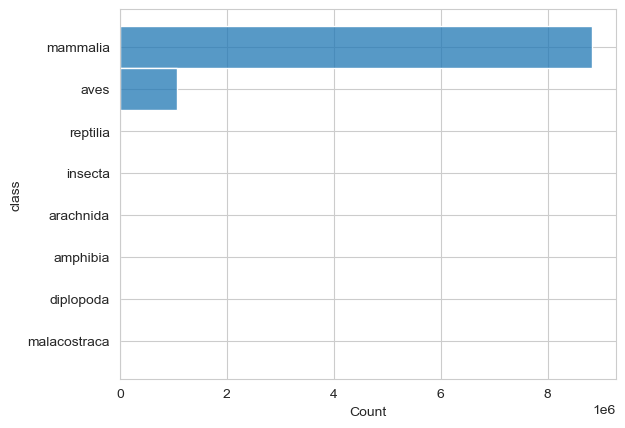

In [66]:
sns.histplot(df_clean.loc[df_clean["original_label"] != "human"], y = 'class')

<Axes: xlabel='Count', ylabel='order'>

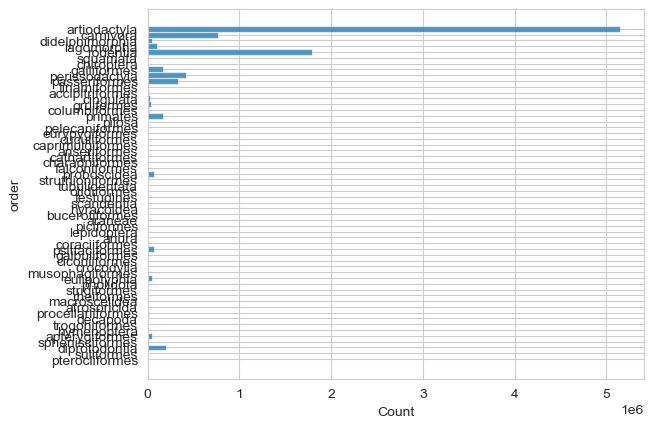

In [67]:
sns.histplot(df_clean.loc[df_clean["original_label"] != "human"], y = 'order')